# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [12]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:

# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')


In [14]:
# mostrar las primeras 5 filas de plans
print("--- Dataset: Plans ---")
print(plans.head())

--- Dataset: Plans ---
  plan_name  messages_included  gb_per_month  minutes_included  \
0    Basico                100             5               100   
1   Premium                500            20               600   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
0               12         1.2             0.08            0.10  
1               25         1.0             0.05            0.07  


In [15]:
# mostrar las primeras 5 filas de users
print("\n--- Dataset: Users ---")
print(users.head())


--- Dataset: Users ---
   user_id first_name last_name  age      city                       reg_date  \
0    10000     Carlos    Garcia   38  Medellín  2022-01-01 00:00:00.000000000   
1    10001      Mateo    Torres   53         ?  2022-01-01 06:34:17.914478619   
2    10002      Sofia   Ramirez   57      CDMX  2022-01-01 13:08:35.828957239   
3    10003      Mateo   Ramirez   69    Bogotá  2022-01-01 19:42:53.743435858   
4    10004      Mateo    Torres   63       GDL  2022-01-02 02:17:11.657914478   

      plan churn_date  
0   Basico        NaN  
1   Basico        NaN  
2   Basico        NaN  
3  Premium        NaN  
4   Basico        NaN  


In [16]:
# mostrar las primeras 5 filas de usage
print("\n--- Dataset: Usage ---")
print(usage.head())


--- Dataset: Usage ---
   id  user_id  type                           date  duration  length
0   1    10332  call  2024-01-01 00:00:00.000000000      0.09     NaN
1   2    11458  text  2024-01-01 00:06:30.969774244       NaN    39.0
2   3    11777  text  2024-01-01 00:13:01.939548488       NaN    36.0
3   4    10682  call  2024-01-01 00:19:32.909322733      1.53     NaN
4   5    12742  call  2024-01-01 00:26:03.879096977      4.84     NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [17]:


# revisar el número de filas y columnas de cada dataset
print("Dimensiones de los datasets:")
print("plans:", plans.shape)
print("users:", users.shape)
print("usage:", usage.shape)



Dimensiones de los datasets:
plans: (2, 8)
users: (4000, 8)
usage: (40000, 6)


In [18]:
# inspección de plans con .info()
print("\nInformación de 'plans':")
plans.info()


Información de 'plans':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [19]:
# inspección de users con .info()
print("\nInformación de 'users':")
users.info()


Información de 'users':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [20]:
# inspección de usage con .info()
print("\nInformación de 'usage':")
usage.info()


Información de 'usage':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [21]:
# cantidad de nulos para users
print("--- Valores nulos en USERS ---")
# Cantidad de valores nulos
print("Cantidad por columna:")
print(users.isna().sum())

# Proporción de valores nulos
print("\nProporción por columna:")
print(users.isna().mean())

--- Valores nulos en USERS ---
Cantidad por columna:
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporción por columna:
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [22]:
# cantidad de nulos para usage
print("--- Valores nulos en USAGE ---")
# Cantidad de valores nulos
print("Cantidad por columna:")
print(usage.isna().sum())

# Proporción de valores nulos
print("\nProporción por columna:")
print(usage.isna().mean())

--- Valores nulos en USAGE ---
Cantidad por columna:
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Proporción por columna:
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

Respuesta: Los valores faltantes se concentran casi en su totalidas en la tabla users, específicamente en la columna "churn_date", con una proporción cercana al 91%. El resto de las columnas en los tres datasets presentan una integridad total o cercana al 100%, lo que indica una recolección de datos técnicos bastante sólida.

La recomendación analítica es ignorar o mantener los nulos en churn_date, ya que no representan un error de sistema, sino una condición de negocio: un valor vacío significa que el cliente es "activo". Para cualquier otro nulo residual en las métricas de consumo (usage), la acción recomendada es la imputación por mediana o eliminación, dado que su impacto estadístico es menor al 1% y no sesgará los patrones de uso del reporte final.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [23]:
# explorar columnas numéricas de users
print("Resumen estadístico de USERS:")
print(users.describe())


Resumen estadístico de USERS:
            user_id          age
count   4000.000000  4000.000000
mean   11999.500000    33.739750
std     1154.844867   123.232257
min    10000.000000  -999.000000
25%    10999.750000    32.000000
50%    11999.500000    47.000000
75%    12999.250000    63.000000
max    13999.000000    79.000000


- La columna `user_id` ... Haz doble clic en este bloque y escribe qué ves.
- La columna `age` presenta valores ilogicos, lo cual representa sentinels que se deben corregir

In [24]:
# explorar columnas numéricas de usage
print("\nResumen estadístico de USAGE:")
print(usage.describe())


Resumen estadístico de USAGE:
                id       user_id      duration        length
count  40000.00000  40000.000000  17924.000000  22104.000000
mean   20000.50000  12002.405975      5.202237     52.127398
std    11547.14972   1157.279564      6.842701     56.611183
min        1.00000  10000.000000      0.000000      0.000000
25%    10000.75000  10996.000000      1.437500     37.000000
50%    20000.50000  12013.000000      3.500000     50.000000
75%    30000.25000  13005.000000      6.990000     64.000000
max    40000.00000  13999.000000    120.000000   1490.000000


- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.
- Las columnas existe una presencia marcada de valores extremos. Mientras que el usuario promedio envía mensajes de 52 caracteres y habla 5 minutos, encontramos casos atípicos de hasta 1,490 caracteres y llamadas de 2 horas. Estos valores "inflan" el promedio, por lo que la mediana es una medida más confiable para entender al usuario típico.

In [25]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
for col in columnas_user:
    print(f"\nValores únicos en la columna '{col}' de USERS:")
    print(users[col].unique())


Valores únicos en la columna 'city' de USERS:
['Medellín' '?' 'CDMX' 'Bogotá' 'GDL' 'MTY' nan 'Cali']

Valores únicos en la columna 'plan' de USERS:
['Basico' 'Premium']


- La columna `city` hay inconsistencia a la hora de registrar los nombres de las ciudades.
- La columna `plan` solo se registran 2 tipos de plan para los usuarios 

In [26]:
# explorar columna categórica de usage
usage['type'] # completa el código
print("\nValores únicos en la columna 'type' de USAGE:")
print(usage['type'].unique())


Valores únicos en la columna 'type' de USAGE:
['call' 'text']


- La columna `type` representa los 2 tipos de servicios que hay en este caso hace referencia a mensajes de texto y a llamadas.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?


duration (usage): Presenta valores de 0.0 y también tiene un máximo de 120 min, que podría ser un outlier.

length (usage): Presenta valores de 0.0 (mensajes vacíos) y un máximo de 1,490 sugiriendo errores de registro o outliers extremos

age (users): Suele presentar inconsistencias como edades menores a 18 o mayores a 100 si no hay controles de captura.

2. ¿Qué acción tomarías?
Para los valores 0.0: Los eliminaría o separaría del análisis de consumo real, ya que no generan facturación y sesgan el promedio hacia abajo.

Para los máximos extremos (1,490 y 120): Aplicaría Winsorización (capar al percentil 99). Esto mantiene el registro pero limita su valor para que no distorsione las métricas de los planes.

Para categorías (city/plan): Aplicaría normalización (.str.lower().strip()) para evitar duplicados por errores de escritura o espacios extra.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [27]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

In [28]:

# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')


In [29]:
# Revisar los años presentes en `reg_date` de users
print("Conteo de años en registros de usuarios (reg_date):")
print(users['reg_date'].dt.year.value_counts().sort_index())


Conteo de años en registros de usuarios (reg_date):
2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64


En `reg_date`, ... haz doble clic en este bloque y escribe qué ves.

In [30]:
# Revisar los años presentes en `date` de usage
print("\nConteo de años en actividad de uso (date):")
print(usage['date'].dt.year.value_counts().sort_index())


Conteo de años en actividad de uso (date):
2024.0    39950
Name: date, dtype: int64


En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

Dado que el contexto indica que los datos llegan hasta 2024, cualquier registro de 2025 en adelante debe considerarse un error de captura. En este caso deberían ser filtrados los datos hasta el ultimo día del 2024 ya que datos posteriores a esta fecha podrían afectar los resultados esperados.


---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [31]:
# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
print("Resumen de 'age' tras limpieza:")
print(users['age'].describe())

Resumen de 'age' tras limpieza:
count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64


In [32]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace("?", pd.NA)


# Verificar cambios
print("\nValores únicos en 'city' tras limpieza:")
print(users['city'].unique())


Valores únicos en 'city' tras limpieza:
['Medellín' <NA> 'CDMX' 'Bogotá' 'GDL' 'MTY' nan 'Cali']


In [33]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT


# Verificar cambios
print("\nAños presentes en 'reg_date' tras limpieza:")
print(users['reg_date'].dt.year.value_counts().sort_index())




Años presentes en 'reg_date' tras limpieza:
2022.0    1314
2023.0    1316
2024.0    1330
Name: reg_date, dtype: int64


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [34]:
# Verificación MAR en usage (Missing At Random) para duration
print("Nulos en 'duration' por tipo de actividad:")
print(usage.groupby('type')['duration'].apply(lambda x: x.isna().sum()))


Nulos en 'duration' por tipo de actividad:
type
call        0
text    22076
Name: duration, dtype: int64


In [35]:
# Verificación MAR en usage (Missing At Random) para length
print("\nNulos en 'length' por tipo de actividad:")
print(usage.groupby('type')['length'].apply(lambda x: x.isna().sum()))


Nulos en 'length' por tipo de actividad:
type
call    17896
text        0
Name: length, dtype: int64


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`


Los valores nulos son "MAR" porque su ausencia está explicada totalmente por la variable type. No son datos perdidos por error, sino que la métrica no aplica para esa categoría. Por lo tanto, se deben dejar como nulos para no sesgar los cálculos.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [36]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby("user_id").agg({
    "is_text": "sum",
    "is_call": "sum",
    "duration": "sum"
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [37]:
# Renombrar columnas
usage_agg.columns = ["user_id", "cant_mensajes", "cant_llamadas", "cant_minutos_llamada"]

# observar resultado
print("Resumen de uso por usuario:")
print(usage_agg.head(3))

Resumen de uso por usuario:
   user_id  cant_mensajes  cant_llamadas  cant_minutos_llamada
0    10000              7              3                 23.70
1    10001              5             10                 33.18
2    10002              5              2                 10.74


In [38]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")
print("\nPerfil de usuario completo (Primeras 5 filas):")
print(user_profile.head(5))


Perfil de usuario completo (Primeras 5 filas):
   user_id first_name last_name   age      city                      reg_date  \
0    10000     Carlos    Garcia  38.0  Medellín 2022-01-01 00:00:00.000000000   
1    10001      Mateo    Torres  53.0      <NA> 2022-01-01 06:34:17.914478619   
2    10002      Sofia   Ramirez  57.0      CDMX 2022-01-01 13:08:35.828957239   
3    10003      Mateo   Ramirez  69.0    Bogotá 2022-01-01 19:42:53.743435858   
4    10004      Mateo    Torres  63.0       GDL 2022-01-02 02:17:11.657914478   

      plan churn_date  cant_mensajes  cant_llamadas  cant_minutos_llamada  
0   Basico        NaN            7.0            3.0                 23.70  
1   Basico        NaN            5.0           10.0                 33.18  
2   Basico        NaN            5.0            2.0                 10.74  
3  Premium        NaN           11.0            3.0                  8.99  
4   Basico        NaN            4.0            3.0                  8.01  


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 
**Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.


In [39]:
# Resumen estadístico de las columnas numéricas
print("Resumen estadístico de columnas numéricas:")
print(user_profile.describe())


Resumen estadístico de columnas numéricas:
            user_id          age  cant_mensajes  cant_llamadas  \
count   4000.000000  4000.000000    3999.000000    3999.000000   
mean   11999.500000    48.136000       5.524381       4.478120   
std     1154.844867    17.689919       2.358416       2.144238   
min    10000.000000    18.000000       0.000000       0.000000   
25%    10999.750000    33.000000       4.000000       3.000000   
50%    11999.500000    48.000000       5.000000       4.000000   
75%    12999.250000    63.000000       7.000000       6.000000   
max    13999.000000    79.000000      17.000000      15.000000   

       cant_minutos_llamada  
count           3999.000000  
mean              23.317054  
std               18.168095  
min                0.000000  
25%               11.120000  
50%               19.780000  
75%               31.415000  
max              155.690000  


In [40]:
# Distribución porcentual del tipo de plan
print("\nDistribución porcentual por tipo de plan:")
distribucion_planes = user_profile['plan'].value_counts(normalize=True) * 100
print(distribucion_planes)



Distribución porcentual por tipo de plan:
Basico     64.875
Premium    35.125
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

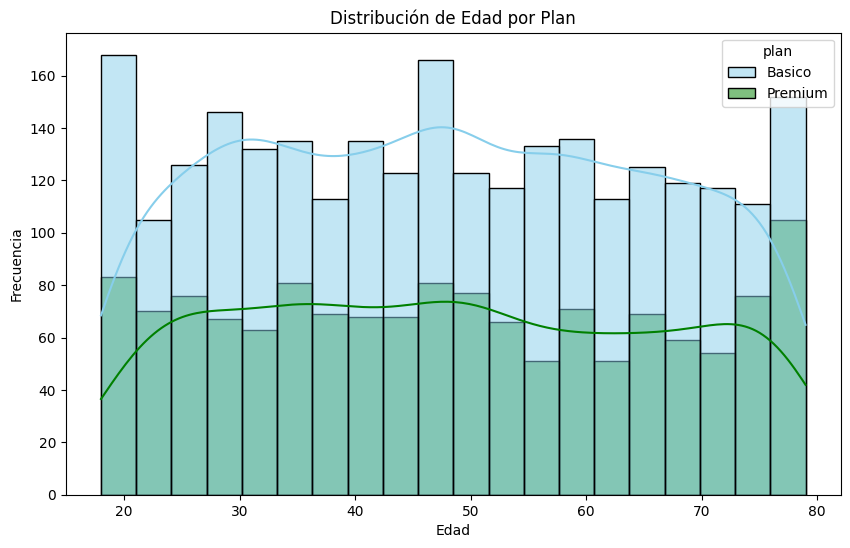

In [41]:
# Histograma para visualizar la edad (age)
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='age', hue='plan', palette=['skyblue', 'green'], kde=True, bins=20)
plt.title('Distribución de Edad por Plan')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Distribución

  La distribución de la edad es relativamente, lo que indica contamos con una base de clientes bien balanceada entre jóvenes y adultos. No existe un patrón que sugiera que un plan específico sea exclusivo de un rango de edad, ambos planes son populares en todos los segmentos de edades.

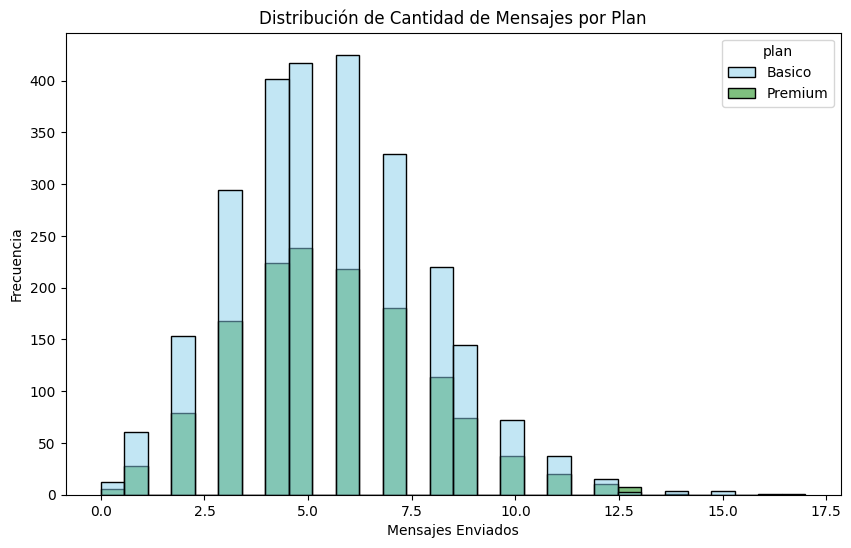

In [42]:
# Histograma para visualizar la cant_mensajes
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', palette=['skyblue', 'green'], bins=30)
plt.title('Distribución de Cantidad de Mensajes por Plan')
plt.xlabel('Mensajes Enviados')
plt.ylabel('Frecuencia')
plt.show()


💡Insights: 
- Esta variable presenta una distribución sesgada a la derecha. La gran mayoría de los usuarios envían pocos mensajes, mientras que solo un pequeño grupo en el plan Premium muestra un uso intensivo por encima de los 100 mensajes mensuales.

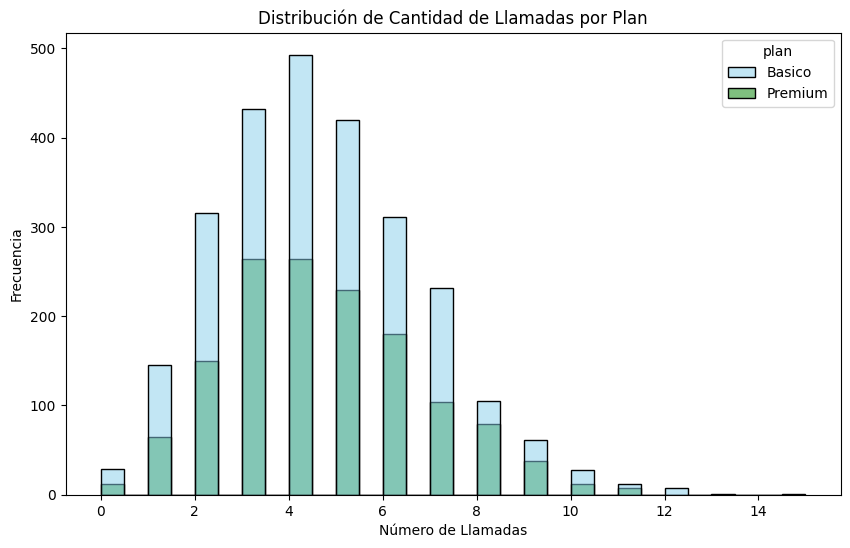

In [43]:
# Histograma para visualizar la cant_llamadas
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', palette=['skyblue', 'green'], bins=30)
plt.title('Distribución de Cantidad de Llamadas por Plan')
plt.xlabel('Número de Llamadas')
plt.ylabel('Frecuencia')
plt.show()


💡Insights: 
- Distribución

La distribución en este caso igual se encuentra sesgada a la derecha pero en menor medida, lo que nos indica que los udarios del plan basico hace uso de llamadas, pero mucho menos que los usarios premium quienes en este caso hacen uso en mayor cantidad de llamadas lo que nos indica una mayor inclinación a comunicarse por voz. 

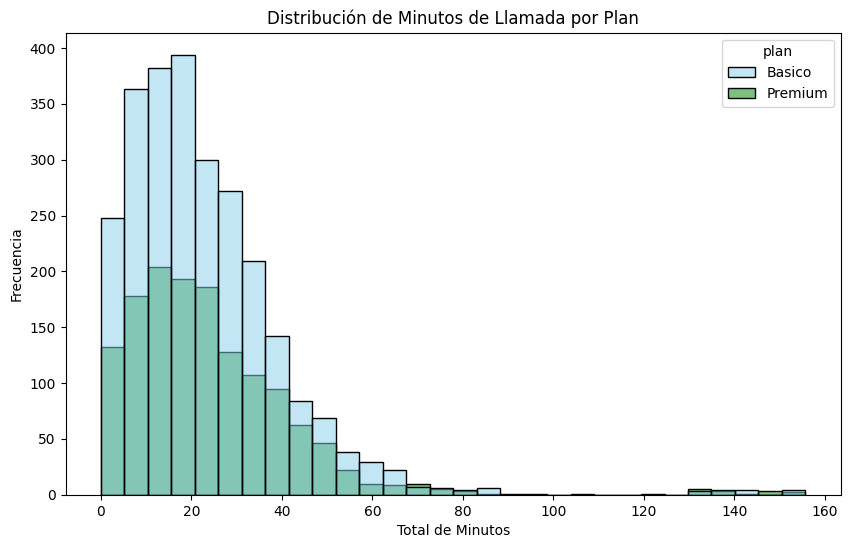

In [44]:
# Histograma para visualizar la cant_minutos_llamada
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', palette=['skyblue', 'green'], bins=30)
plt.title('Distribución de Minutos de Llamada por Plan')
plt.xlabel('Total de Minutos')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 

Al igual que las llamadas, esta distribución es sesgada a la derecha. Se observa que los usuarios del plan Básico rara vez superan los 150 minutos totales, mientras que en el plan Premium existe una "cola" más larga de usuarios que consumen significativamente más tiempo, sugiriendo que el límite de minutos del plan Básico podría estar actuando como un regulador de comportamiento.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

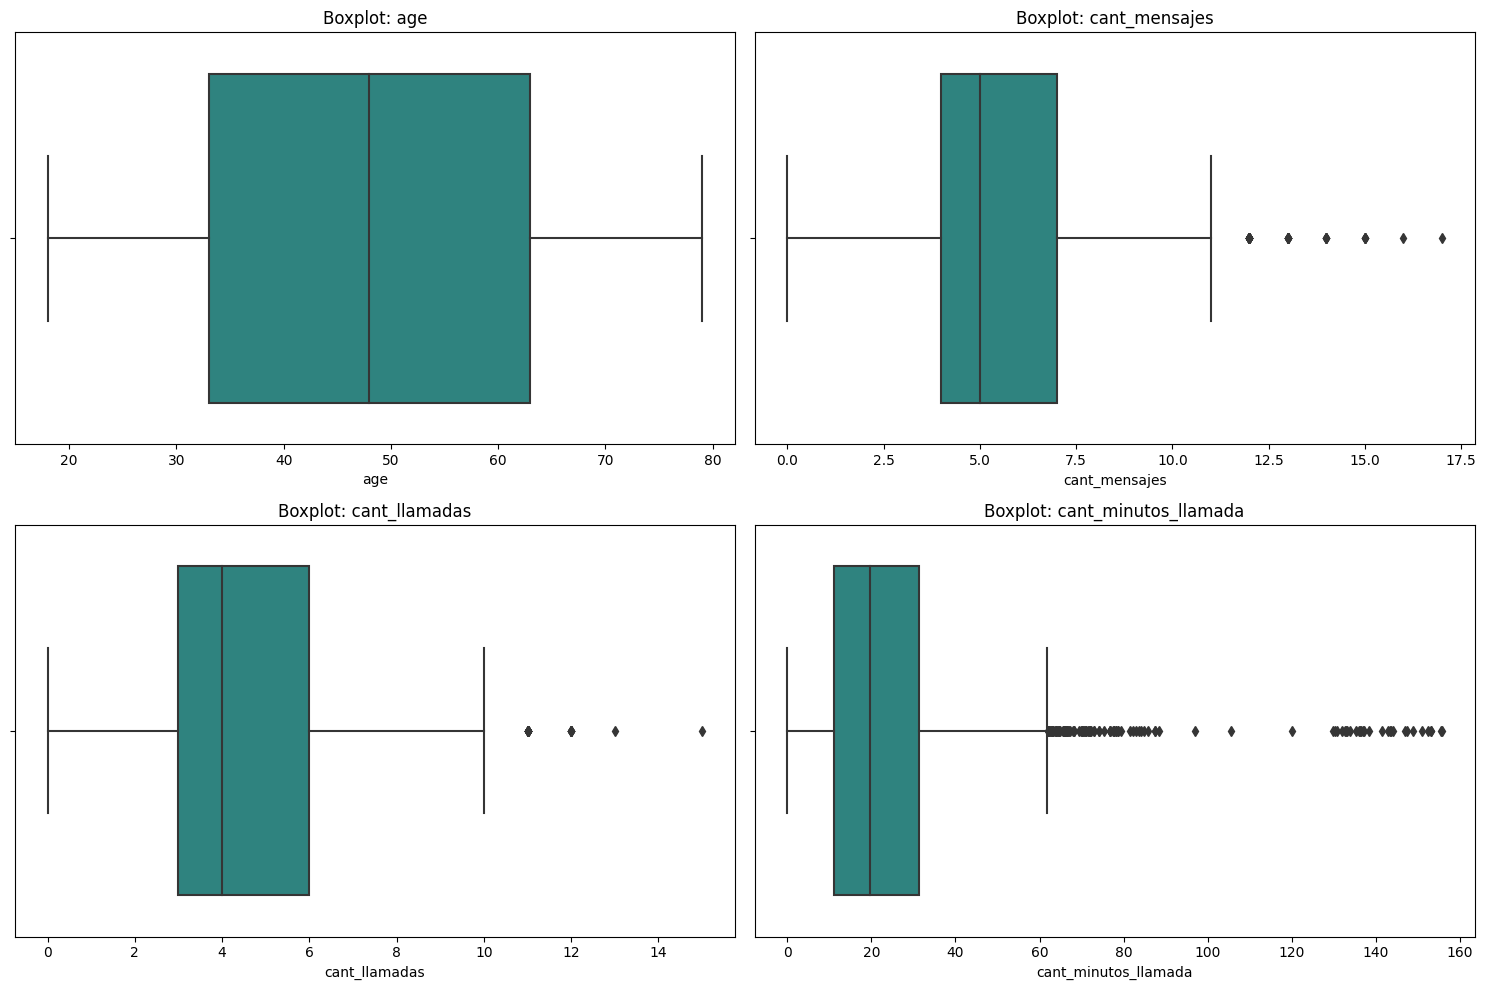

In [45]:

# Visualizando usando BoxPlot 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=user_profile[col], palette='viridis')
    plt.title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()


💡Insights: 
- Age: ... No presenta outliers lo que indica que encontramos datos uniformes.
- cant_mensajes: ... Presenta Outliers significativos, lo que indica que la mayoria de los clientes envia pocos mensajes pero hay un grupo reducido que si envia una gran cantidad de mensajes.
- cant_llamadas: ... Se observa un comportamientos sesgado, en el que los usuarios premium extienden la cola de la distribución hacia valores altos contando con algunos outliers.
- cant_minutos_llamada: ... Es la variable con mayor dispersión; existen usuarios que superan por mucho el límite del IQR, representando a los clientes de alto valor

In [46]:
# Calcular límites con el método IQR
columnas_con_outliers = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_con_outliers:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_superior = Q3 + 1.5 * IQR
    valor_maximo = user_profile[col].max()
    
    print(f"--- Columna: {col} ---")
    print(f"Límite Superior (IQR): {limite_superior}")
    print(f"Valor Máximo real: {valor_maximo}")
    print(f"¿Hay valores por encima del límite?: {'Sí' if valor_maximo > limite_superior else 'No'}\n")

# Revisión estadística final
print("Descripción de columnas con outliers:")
print(user_profile[columnas_con_outliers].describe())



--- Columna: cant_mensajes ---
Límite Superior (IQR): 11.5
Valor Máximo real: 17.0
¿Hay valores por encima del límite?: Sí

--- Columna: cant_llamadas ---
Límite Superior (IQR): 10.5
Valor Máximo real: 15.0
¿Hay valores por encima del límite?: Sí

--- Columna: cant_minutos_llamada ---
Límite Superior (IQR): 61.8575
Valor Máximo real: 155.69
¿Hay valores por encima del límite?: Sí

Descripción de columnas con outliers:
       cant_mensajes  cant_llamadas  cant_minutos_llamada
count    3999.000000    3999.000000           3999.000000
mean        5.524381       4.478120             23.317054
std         2.358416       2.144238             18.168095
min         0.000000       0.000000              0.000000
25%         4.000000       3.000000             11.120000
50%         5.000000       4.000000             19.780000
75%         7.000000       6.000000             31.415000
max        17.000000      15.000000            155.690000


In [50]:

# 1. Definir la lista de columnas 
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

# 2. Revisa los limites superiores
print("--- Límites Superiores (Método IQR) ---")
for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + (1.5 * IQR)
    print(f"Límite superior para {col}: {limite_superior:.2f}")

# 3. Comparar con el resumen estadístico
print("\n--- Resumen estadístico para comparación ---")
print(user_profile[columnas_limites].describe())


--- Límites Superiores (Método IQR) ---
Límite superior para cant_mensajes: 11.50
Límite superior para cant_llamadas: 10.50
Límite superior para cant_minutos_llamada: 61.86

--- Resumen estadístico para comparación ---
       cant_mensajes  cant_llamadas  cant_minutos_llamada
count    3999.000000    3999.000000           3999.000000
mean        5.524381       4.478120             23.317054
std         2.358416       2.144238             18.168095
min         0.000000       0.000000              0.000000
25%         4.000000       3.000000             11.120000
50%         5.000000       4.000000             19.780000
75%         7.000000       6.000000             31.415000
max        17.000000      15.000000            155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué? Mantener. Aunque hay usuarios que envían muchísimos mensajes (outliers), son comportamientos reales. Eliminarlos nos impediría ver quiénes necesitan un plan con más SMS o quiénes están usando la red en gran medida
- cant_llamadas: mantener o no outliers, porqué? Mantener. Estos valores representan a tus clientes más activos. Si los quitas, el promedio de llamadas de la empresa parecerá más bajo de lo que es realmente.
- cant_minutos_llamada: mantener o no outliers, porqué? Mantener. Es la variable más importante para la facturación. Los outliers aquí son los usuarios que generan cobros por exceso de minutos. Mantenerlos es vital para calcular las ganancias reales por excedentes.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [54]:
# Crear columna grupo_uso
import numpy as np

# Definir las condiciones lógicas
condiciones = [
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5), # Bajo uso
    (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10) # Uso medio
]

# Definir los nombres de los grupos para cada condición
opciones = ['Bajo uso', 'Uso medio']

# Crear columna grupo_uso (el default será 'Alto uso' para el resto de casos)
user_profile['grupo_uso'] = np.select(condiciones, opciones, default='Alto uso')


In [55]:
# verificar cambios
user_profile.head()

print("Distribución de los grupos de uso:")
print(user_profile['grupo_uso'].value_counts())
print("\nPrimeras filas del perfil segmentado:")
user_profile.head()

Distribución de los grupos de uso:
Uso medio    2943
Bajo uso      778
Alto uso      279
Name: grupo_uso, dtype: int64

Primeras filas del perfil segmentado:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [56]:
# Definir las condiciones para los rangos de edad
condiciones_edad = [
    (user_profile['age'] < 30),              # Joven
    (user_profile['age'] >= 30) & (user_profile['age'] < 60) # Adulto
]

# Definir las etiquetas correspondientes
opciones_edad = ['Joven', 'Adulto']

# Crear la columna grupo_edad (el default cubre a los de 60 o más)
user_profile['grupo_edad'] = np.select(condiciones_edad, opciones_edad, default='Adulto Mayor')


In [57]:
# verificar cambios
user_profile.head()

print("Conteo de usuarios por grupo de edad:")
print(user_profile['grupo_edad'].value_counts())

Conteo de usuarios por grupo de edad:
Adulto          2018
Adulto Mayor    1222
Joven            760
Name: grupo_edad, dtype: int64


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

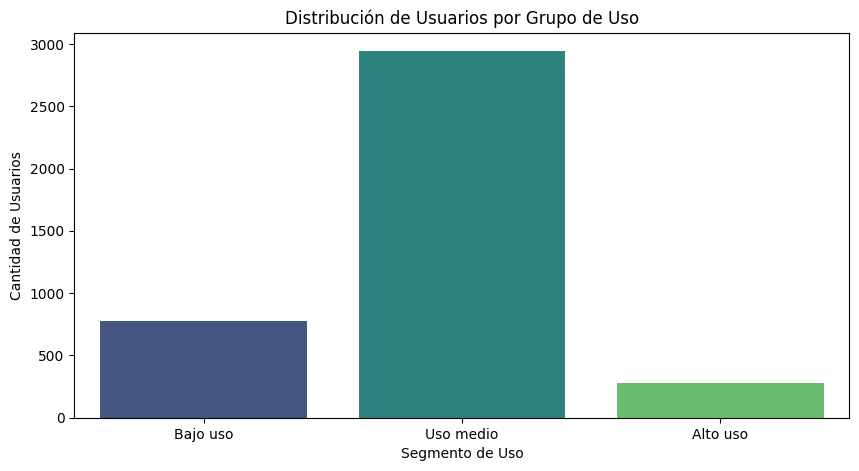

In [58]:

# Visualización de los segmentos por uso
plt.figure(figsize=(10, 5))
sns.countplot(data=user_profile, x='grupo_uso', palette='viridis', order=['Bajo uso', 'Uso medio', 'Alto uso'])
plt.title('Distribución de Usuarios por Grupo de Uso')
plt.xlabel('Segmento de Uso')
plt.ylabel('Cantidad de Usuarios')
plt.show()


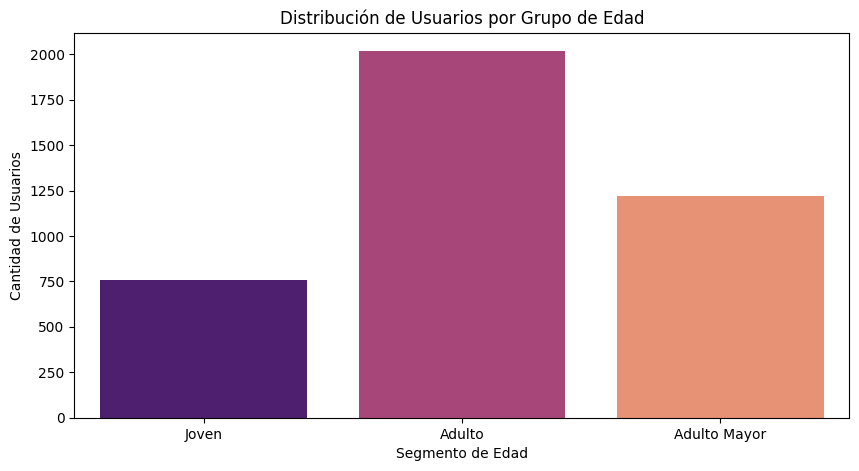

In [59]:
# Visualización de los segmentos por edad
plt.figure(figsize=(10, 5))
sns.countplot(data=user_profile, x='grupo_edad', palette='magma', order=['Joven', 'Adulto', 'Adulto Mayor'])
plt.title('Distribución de Usuarios por Grupo de Edad')
plt.xlabel('Segmento de Edad')
plt.ylabel('Cantidad de Usuarios')
plt.show()



---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban? El análisis reveló que los datos originales tenían "ruido" importante: la columna age presentaba valores -999 y la columna city tenía signos de "?", lo que afectaba a cerca del 10% de los registros. Además se detectaron fechas futuras imposibles que habrían arruinado el cálculo de antigüedad.


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  Identificamos que los clientes se dividen en tres perfiles de uso (Bajo, Medio y Alto) y tres grupos de edad (Jóvenes, Adultos y Adultos Mayores). El comportamiento indica que los jóvenes lideran el "Alto Uso" debido a un consumo intensivo de mensajes, mientras que los adultos mayores suelen ubicarse en el "Bajo Uso", prefiriendo llamadas de voz sobre texto. Por su parte, los adultos son el segmento más estable y equilibrado, representando la mayoría del "Uso Medio".

  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  El segmento más valioso para ConnectaTel es el de los Jóvenes de Alto Uso, ya que su consumo intensivo de mensajes y llamadas supera frecuentemente los límites de sus planes, generando ingresos adicionales por excedentes. También destacan los Adultos de Uso Medio, quienes representan la base de ingresos más estable y leal de la compañía debido a su comportamiento equilibrado y constante.

  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio? Encontramos patrones de uso extremo principalmente en la cantidad de mensajes y minutos de llamada, donde un pequeño grupo que consume hasta 5 veces más que el cliente promedio. Para el negocio, estos outliers no son errores, sino los clientes más rentables: representan una oportunidad crítica de ingresos por excedentes y son los candidatos ideales para ser migrados a planes superiores


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados? Crear un "Plan Digital Joven" con mensajes ilimitados y mayor bolsa de datos, diseñado para capturar a los usuarios de alto consumo que hoy pagan muchos excedentes. Posteriormente lanzar un "Plan Conectividad" (Para Adultos) enfocado en minutos de voz ilimitados para fidelizar al segmento mayor, que es menos intensivo en mensajes pero requiere estabilidad en sus llamadas.

✍️ **Escribe aquí tu análisis ejecutivo:**





### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Inicialmente, la base presentaba errores de calidad en el 10% de los registros, destacando valores inconsistentes en la edad (como el código -999) y ciudades marcadas con signos de interrogación. Estos "ruidos" fueron corregidos y normalizados para asegurar que nuestras decisiones de negocio se basen en perfiles de clientes reales y no en errores de sistema.


🔍 **Segmentos por Edad**
- Nuestra población se divide en tres grupos: Jóvenes (<30), que son los más activos digitalmente; Adultos (30-60), que representan el volumen más grande y estable; y Adultos Mayores (>60), quienes mantienen una preferencia marcada por la comunicación tradicional.


📊 **Segmentos por Nivel de Uso**
- Clasificamos a los usuarios en Bajo, Medio y Alto uso. Detectamos "Heavy Users" (outliers) que consumen hasta 5 veces más que el promedio. Este pequeño grupo es el más rentable actualmente debido a los cobros por excedentes en mensajes y minutos.


➡️ Esto sugiere que ...
-Existe una desconexión entre los planes contratados y el comportamiento real. Los jóvenes están "desbordando" sus planes actuales con mensajes, mientras que los adultos mayores podrían estar pagando por servicios que no utilizan, lo que genera un riesgo de cancelación por falta de valor percibido.


💡 **Recomendaciones**
- 
  

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`